# Classification with Logistic Regression
Loading the packages we will use

In [1]:
using CSV
using Plots
using DataFrames
using MLBase

Plotting the logistic curve wich function is:
$$  f(x) = \frac{1}{1+e^{-x}}  $$

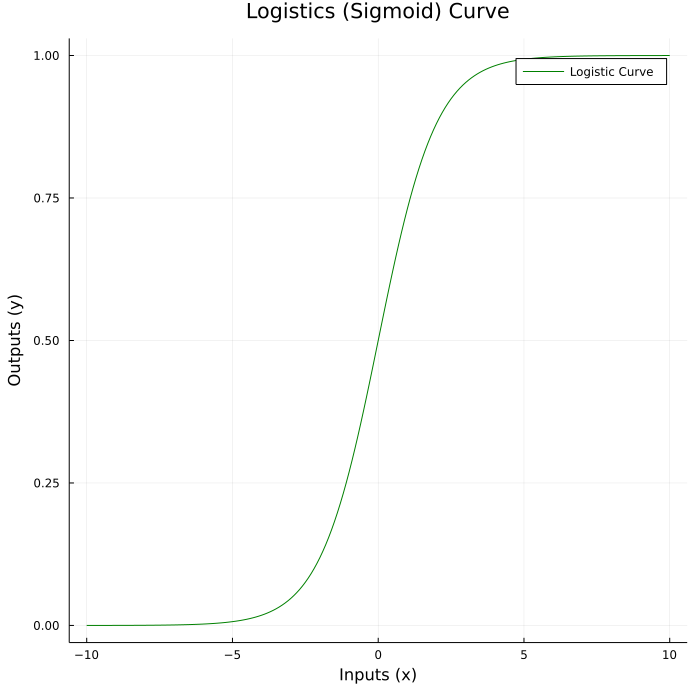

In [2]:
gr(size = (700,700))

logistic(x) = 1/(1+exp(-x))

plot(-10.0:0.1:10, logistic,
xlabel = "Inputs (x)",
ylabel = "Outputs (y)",
title = "Logistics (Sigmoid) Curve",
label = "Logistic Curve",
color = :green)

Moidfying the logistic curve to use the minimization method of batch gradient descendent.\
Initializing parameters

In [3]:
θ_0 = 0.0; #y-intercept (default = 0| try 1 & -1)
θ_1 = 1.0; #slope (default = 1| try -0.5 & 0.5)

Defining the hypothesis function $h(x)$ and we subsitute $x$ to the linear function $z(x)$ 

In [4]:
z(x) = θ_0.+θ_1*x;
h(x) = 1 ./(1 .+exp.(-z(x)));

Now we plot this new logistic curve

In [5]:
plot!(h, color = :black, linestyle = :dash, label = "Adjustable with z(x) and h(x)")

Now let us load the dataset for this project

In [6]:
DF = CSV.read("wolfspider.csv",DataFrame)
describe(DF)
LabelMap = labelmap(DF.class)
Y = labelencode(LabelMap,DF.class) .-1;
X = DF.feature;

Plotting the scatter of the data

In [7]:
Data = scatter(X, Y,
xlabel = "Size of Grains of Sand (mm)",
ylabel = "Probability of Observation (Present = 1 | Absent = 0)",
title = "Wolf Spider Presence Classifier",
legend = false,
color = :orange, 
merkersize = 5)

For implementing the optimization algorithm (Batch Gradient Descendent) we initialize paramters and we will track the change of them

In [8]:
θ_0 = 0.0
θ_1 = 1.0
t0_history = []
t1_history = []
push!(t0_history,θ_0)
push!(t1_history,θ_1)

z(x) = θ_0.+θ_1*x;
h(x) = 1 ./(1 .+exp.(-z(x)))

h (generic function with 1 method)

Adding the intial Sigmoid Curve to the scatter plot

In [9]:
plot!(0:0.01:1.1, h, label = "Logistic Curve", linewidth = 2, color = :red)

Defining the cost function:
$$ J(\theta_0, \theta_1)=
-\frac{1}{m}\sum_{i=1}^m( y^{(i)}\log h_\theta(x^{(i)})+(1-y^{(i)})\log(1-h_\theta(x^{(i)})))  $$

In [10]:
m = length(X)
ŷ = h(X)

function cost()
    (-1 / m) * sum(
        Y .* log.(ŷ) +
        (1 .- Y) .* log.(1 .- ŷ)
    )
end

J = cost()


0.6010705917827384

Now for implement the algorithm we do the partial derivatives of the cost function
$$\partial_{\theta_0}J=\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})$$ 
and $$\partial_{\theta_1}J=\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}$$

In [11]:
function pd_t0()
    sum(ŷ-Y) 
end

function pd_t1()
    sum((ŷ-Y) .*X) 
end

pd_t1 (generic function with 1 method)

setting learning rate, and intializin epochs, also we calculate the partial derivatives, and we star the algorithm and putting it into a loop untill it convege

In [12]:
α = 0.01;
epochs = 0


0

In [13]:
J_history = []
for i = 0:4000
    p_t0 = pd_t0();
    p_t1 = pd_t1();

    θ_0 -= α * p_t0
    θ_1 -= α * p_t1

    
    push!(J_history, J)
    push!(t0_history, θ_0)
    push!(t1_history, θ_1)

    #reculaculate cost
    ŷ = h(X)
    J = cost()

    #replot prediction
    epochs += 1

    plot!(0:0.1:1.2,h, color = :green, α = 0.025,
        title = "Wolf Spider Presence Classifier (epochs = $epochs)")
end
Data


Now after see the model converges, we plot the learning curve

In [14]:
gr(size = (600,600))
p_line = plot(0:epochs-1, J_history,
xlabel = "Epochs",
ylabel = "Cost",
title = "Learning Curve",
legend = false,
color = :magenta,
linewidth = 2.5)

Now let us see the evolution of the parameters

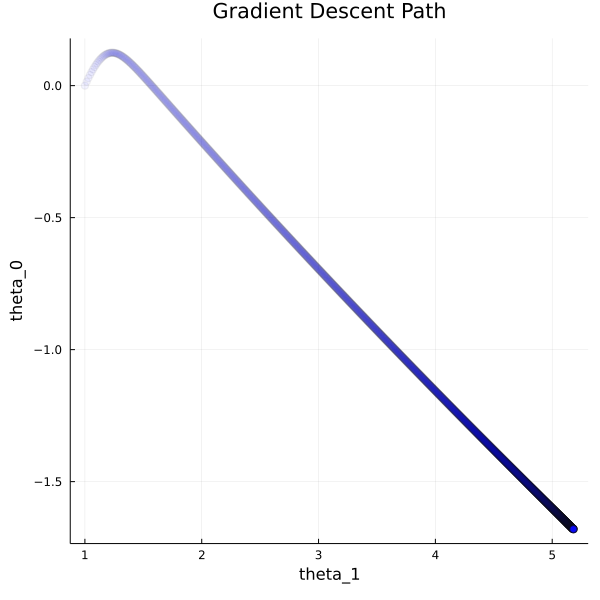

In [15]:
p_params = scatter(t1_history, t0_history,
    xlabel = "theta_1",
    ylabel = "theta_0",
    title = "Gradient Descent Path",
    legend = false,
    color = :blue,
    alpha = 0.05
)

Now we predict using new data

In [16]:
newX = [0.25, 0.5, 0.75, 1.0]

h(newX)

4-element Vector{Float64}:
 0.40499706845916594
 0.7131941434502285
 0.900839092475562
 0.9707507964255118

### Logisitc Regression using ScikitLearn with PyCall

In [17]:
using PyCall
using Conda


Calling the modules that we will use

In [18]:
skl = pyimport("sklearn")
model_selection = pyimport("sklearn.model_selection")
linear_model = pyimport("sklearn.linear_model")
np = pyimport("numpy")
expit = pyimport("scipy.special")

PyObject <module 'scipy.special' from 'C:\\Users\\PC\\.julia\\conda\\3\\lib\\site-packages\\scipy\\special\\__init__.py'>

Spliting data into trainning and testing

In [19]:
X_train, X_test, Y_train, Y_test  = model_selection.train_test_split(X,Y);


In [39]:
LogReg = linear_model.LogisticRegression(solver="lbfgs")
LogReg.fit(np.reshape(X,(-1,1)),Y)
LogReg.predict(np.reshape(X_test,(-1,1)));

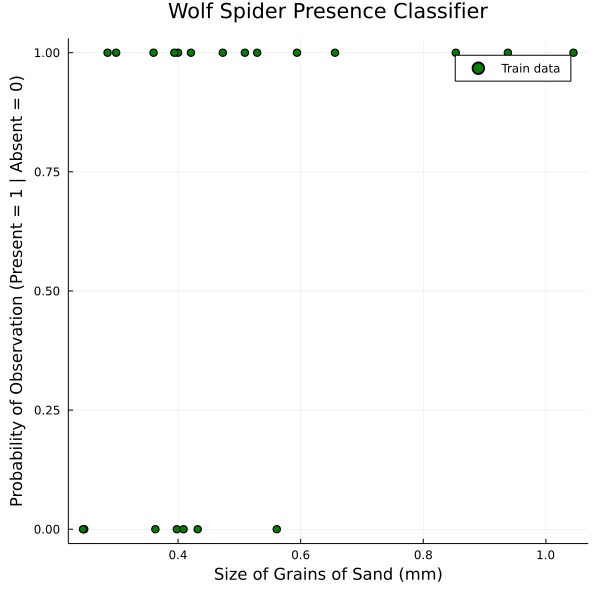

In [54]:
scatter(X_train, Y_train,
xlabel = "Size of Grains of Sand (mm)",
ylabel = "Probability of Observation (Present = 1 | Absent = 0)",
title = "Wolf Spider Presence Classifier",
label = "Train data",
color = :green, 
merkersize = 5)

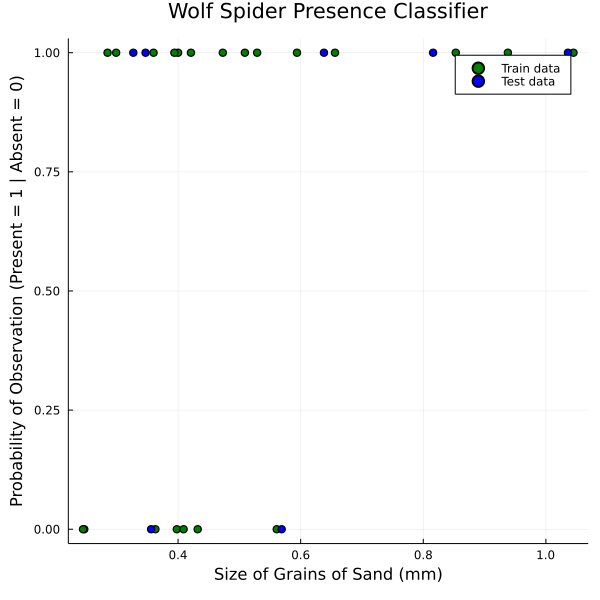

In [55]:
scatter!(X_test, Y_test,
xlabel = "Size of Grains of Sand (mm)",
ylabel = "Probability of Observation (Present = 1 | Absent = 0)",
title = "Wolf Spider Presence Classifier",
label = "Test data",
color = :blue, 
merkersize = 5)

In [56]:
@show θ_0 = #LogReg.coef_[1,1]
@show θ_1 = LogReg.intercept_[1,1]

z(x) = θ_0.+θ_1*x;
h(x) = 1 ./(1 .+exp.(-z(x)))

θ_1 = LogReg.intercept_[1, 1] = 0.32315886057270765
θ_0 = #= c:\JuliaProjects\Julia-ML-Practices\Julia-ML-Classification\ClassificationSL.ipynb:2 =# @show(θ_1 = LogReg.intercept_[1, 1]) = 0.32315886057270765


h (generic function with 1 method)

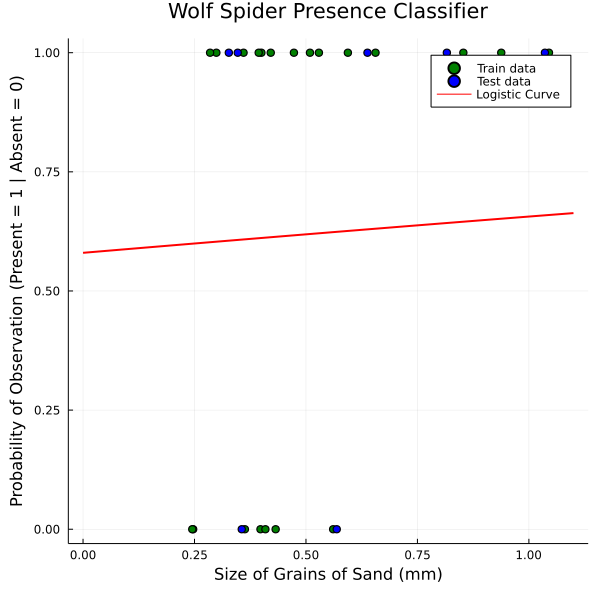

In [57]:
plot!(0:0.01:1.1, h, label = "Logistic Curve", linewidth = 2, color = :red)

In [58]:
LogReg.score(np.reshape(X_test,(-1,1)),Y_test)

0.7142857142857143